In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("train_dataframe_with_features.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36473 entries, 0 to 36472
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   id                                                  36473 non-null  object 
 1   anchor                                              36473 non-null  object 
 2   target                                              36473 non-null  object 
 3   context                                             36473 non-null  object 
 4   score                                               36473 non-null  float64
 5   context_text                                        36473 non-null  object 
 6   score_map                                           36473 non-null  int64  
 7   anchor_target_CPCdescription                        36473 non-null  object 
 8   same_anchor_similar_targets                         36473 non-null  object 


In [4]:
df.score.value_counts()

0.50    12300
0.25    11519
0.00     7471
0.75     4029
1.00     1154
Name: score, dtype: int64

In [5]:
len(df[df.score >= 0.5])

17483

In [6]:
len(df[df.score < 0.5])

18990

In [17]:
df.context.apply(lambda x: x[0]).sort_values().value_counts()

B    8019
H    6195
G    6013
C    5288
A    4094
F    4054
E    1531
D    1279
Name: context, dtype: int64

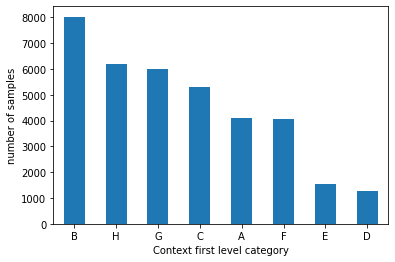

In [62]:
df.context.apply(lambda x: x[0]).value_counts().plot(kind="bar")
# bin_centers = 0.5 * (bins[:-1] + bins[1:])

# plt.xticks(bin_centers)
plt.xticks(rotation=0)
plt.xlabel("Context first level category")
plt.ylabel("number of samples")
plt.savefig("plots/context_distribution.png")

In [58]:
df.score.value_counts(sort=False).sort_index()

0.00     7471
0.25    11519
0.50    12300
0.75     4029
1.00     1154
Name: score, dtype: int64

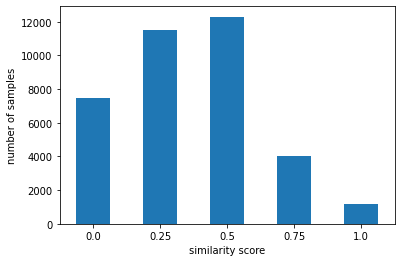

In [63]:
df.score.value_counts(sort=False).sort_index().plot.bar()
# bin_centers = 0.5 * (bins[:-1] + bins[1:])

# plt.xticks(bin_centers)
plt.xticks(rotation=0)
plt.xlabel("similarity score")
plt.ylabel("number of samples")
plt.savefig("plots/score_distribution.png")

In [86]:
s="abc"

In [87]:
s[0]

'a'

In [88]:
df.context.apply(lambda x: x[0]).sort_values().value_counts().sort_index()

A    4094
B    8019
C    5288
D    1279
E    1531
F    4054
G    6013
H    6195
Name: context, dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36473 entries, 0 to 36472
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        36473 non-null  object 
 1   anchor                    36473 non-null  object 
 2   target                    36473 non-null  object 
 3   context                   36473 non-null  object 
 4   score                     36473 non-null  float64
 5   context_text              36473 non-null  object 
 6   text                      36473 non-null  object 
 7   diff_targets_same_anchor  35549 non-null  object 
 8   same_anchor_context       32748 non-null  object 
 9   anchor_list               36376 non-null  object 
dtypes: float64(1), object(9)
memory usage: 2.8+ MB


In [90]:
features_list = ['context_text','diff_targets_same_anchor','same_anchor_context','anchor_list']

In [91]:
for feature in features_list:
    df[feature+'_word_count'] = df[feature].astype(str).apply(lambda x: x.count(' '))

In [92]:
features_list_counts = [feature+'_word_count' for feature in features_list]

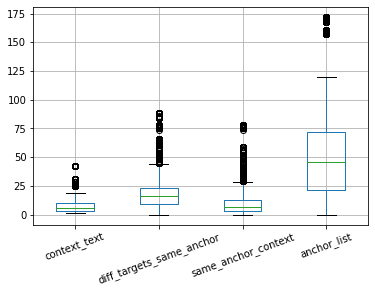

In [93]:
df[features_list_counts].boxplot()
plt.xticks(ticks=range(1,5),labels=features_list, rotation=20)
plt.savefig("plots/boxplots_old_features")


In [94]:
len(df.anchor.unique())

733

In [95]:
len(df.target.unique())

29340

In [101]:
df = df.fillna("")

In [102]:
for f in ['diff_targets_same_anchor','same_anchor_context','anchor_list']:
    df[f'{f}_text'] = df.apply(lambda row: f'{row.anchor}[SEP]{row.target}[SEP]{row[f]}', axis=1)

In [111]:
df.to_csv("train_dataframe_with_features.csv")

In [112]:
df.diff_targets_same_anchor.loc[16478]

''